# Linear regression

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Motivation</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exploratory Analysis</a></span></li></ul></li><li><span><a href="#Simple-linear-regression" data-toc-modified-id="Simple-linear-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simple linear regression</a></span><ul class="toc-item"><li><span><a href="#Let's-do-it-backwards" data-toc-modified-id="Let's-do-it-backwards-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Let's do it backwards</a></span></li></ul></li><li><span><a href="#We-generate-data-to-explain-in-an-&quot;inverse&quot;-way-to-what-was-seen-a-moment-ago" data-toc-modified-id="We-generate-data-to-explain-in-an-&quot;inverse&quot;-way-to-what-was-seen-a-moment-ago-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>We generate data to explain in an "inverse" way to what was seen a moment ago</a></span></li><li><span><a href="#We-draw-the-regression-line" data-toc-modified-id="We-draw-the-regression-line-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>We draw the regression line</a></span></li><li><span><a href="#How-good-is-our-model?" data-toc-modified-id="How-good-is-our-model?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>How good is our model?</a></span></li><li><span><a href="#Calculate-the-R2-of-the-model" data-toc-modified-id="Calculate-the-R2-of-the-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Calculate the R2 of the model</a></span></li><li><span><a href="#Linear-regression-with-sklearn" data-toc-modified-id="Linear-regression-with-sklearn-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Linear regression with sklearn</a></span></li><li><span><a href="#Linear-regression-with-statsmodels" data-toc-modified-id="Linear-regression-with-statsmodels-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Linear regression with statsmodels</a></span></li><li><span><a href="#OLS-Concepts" data-toc-modified-id="OLS-Concepts-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>OLS Concepts</a></span></li><li><span><a href="#Multiple-Linear-Regression" data-toc-modified-id="Multiple-Linear-Regression-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Multiple Linear Regression</a></span></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Categorical variables</a></span></li><li><span><a href="#Linear-model-extensions" data-toc-modified-id="Linear-model-extensions-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Linear model extensions</a></span><ul class="toc-item"><li><span><a href="#Challenging-the-additive-assumption:-synergy" data-toc-modified-id="Challenging-the-additive-assumption:-synergy-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Challenging the additive assumption: synergy</a></span></li></ul></li><li><span><a href="#Let's-do-it" data-toc-modified-id="Let's-do-it-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Let's do it</a></span></li><li><span><a href="#Model-selection" data-toc-modified-id="Model-selection-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Model selection</a></span><ul class="toc-item"><li><span><a href="#$R^2$-Adjusted" data-toc-modified-id="$R^2$-Adjusted-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>$R^2$ Adjusted</a></span></li></ul></li><li><span><a href="#Potential-problems-in-linear-regression" data-toc-modified-id="Potential-problems-in-linear-regression-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Potential problems in linear regression</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Further-Materials" data-toc-modified-id="Further-Materials-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Further Materials</a></span></li></ul></div>

In [491]:
#!pip install scikit-learn

In [492]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

## Motivation

In [493]:
data = pd.read_csv("../datasets/hours_vs_mark.csv", index_col=0)

In [494]:
data

,hours,mark
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86
...,...,...
95,252,66
96,49,21
97,792,97
98,310,46


We have 100 students, and we know:
 * How many hours they studied for their exam
 * The grade they have obtained (from 0 to 100)

### Exploratory Analysis

In [495]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hours   100 non-null    int64
 1   mark    100 non-null    int64
dtypes: int64(2)
memory usage: 2.3 KB


In [496]:
data.shape

(100, 2)

In [497]:
data.describe()

,hours,mark
count,100.000000,100.000000
mean,428.540000,47.940000
std,285.241752,27.757907
min,2.000000,0.000000
25%,167.250000,29.500000
50%,424.500000,44.000000
75%,662.500000,68.000000
max,986.000000,100.000000


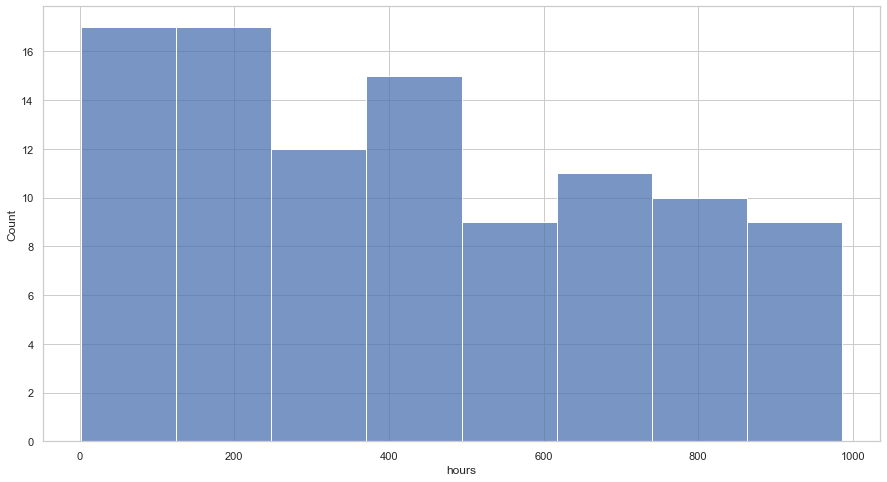

In [498]:
sns.histplot(data.hours);

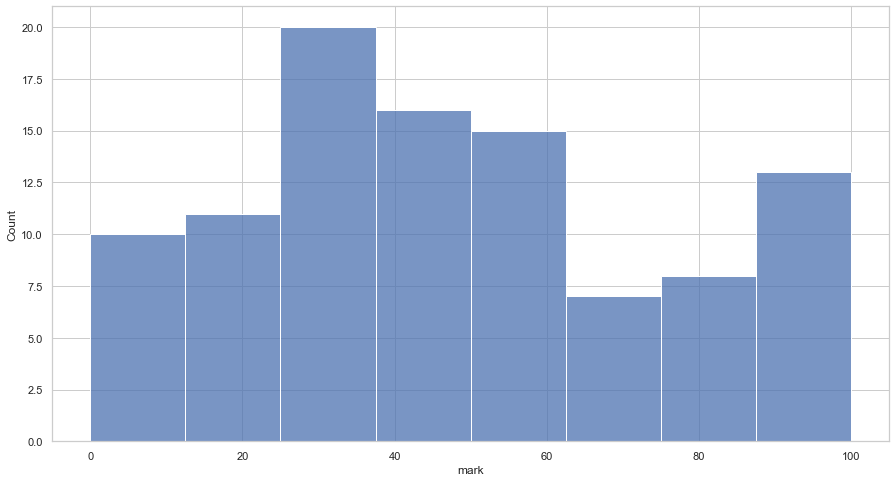

In [499]:
sns.histplot(data.mark);

We would like to understand the relationship $$grade = f(hours)$$

To be able to **predict the expected grade** that we will obtain when studying a certain number of hours

In [500]:
data.corr()

,hours,mark
hours,1.000000,0.867072
mark,0.867072,1.000000


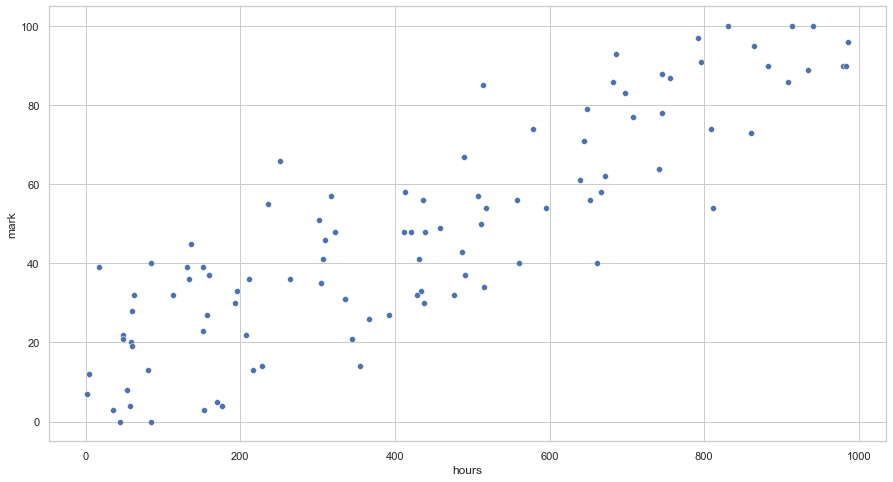

In [501]:
sns.scatterplot(x=data["hours"], y=data["mark"]);

Let's try a $$Y = m * X + n$$ linear regression
$m$ is the slope
$n$ is the value of $Y$ when $X=0$
And we have to:
$$grade = m * hours + n$$
We want to find $m$ and $n$ that *best* model our data


In [502]:
data["prediction_1"] = 0.1 * data.hours + 5
data["prediction_2"] = 0.12 * data.hours + 10

In [503]:
data.head()

,hours,mark,prediction_1,prediction_2
0,865,95,91.5,113.80
1,4,12,5.4,10.48
2,305,35,35.5,46.60
3,437,56,48.7,62.44
4,682,86,73.2,91.84


In [504]:
def predict_grade (hours):
    return hours * 0.1 + 5

In [505]:
predict_grade(865)

91.5

Which has worked better? How can we measure the error of the models?

We can subtract our prediction from the grade to see what we have done wrong in each one and make the average.... we use the absolute value to remove the negative values ​​and then we talk about this error, which has a name and it is MAE (mean absolutely error)

In [506]:
data["error_1"] = (data.mark - data["prediction_1"]).abs()
data["error_2"] = (data.mark - data["prediction_2"]).abs()

In [507]:
data.head()

,hours,mark,prediction_1,prediction_2,error_1,error_2
0,865,95,91.5,113.80,3.5,18.80
1,4,12,5.4,10.48,6.6,1.52
2,305,35,35.5,46.60,0.5,11.60
3,437,56,48.7,62.44,7.3,6.44
4,682,86,73.2,91.84,12.8,5.84


In [508]:
data.error_1.mean()

12.008

In [509]:
data.error_2.mean()

18.073599999999995

What is going to be our goal? Python and its libraries do this for us, it calculates the slope and the intercept to be able to make "predictions" of unknown data from data that we already have.

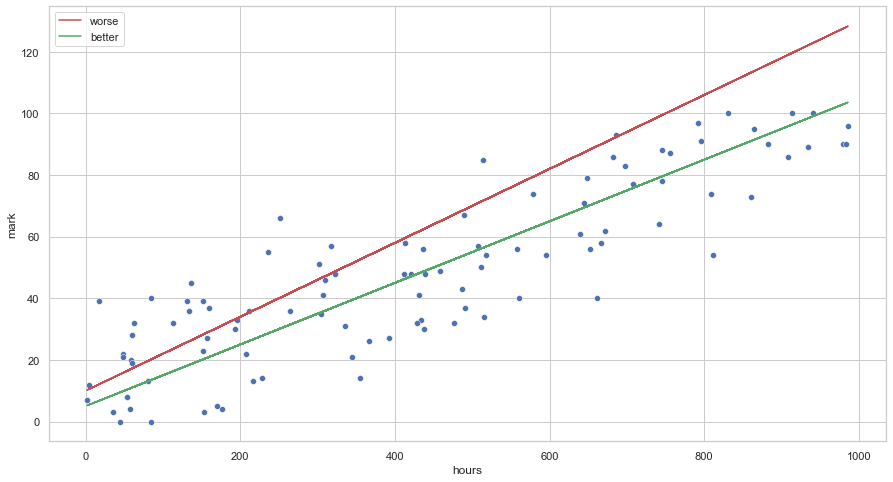

In [510]:
sns.scatterplot(x=data["hours"], y=data["mark"])
plt.plot(data.hours, data["prediction_2"], color='r', label='worse') # greater MAE
plt.plot(data.hours, data["prediction_1"], color='g', label='better')
plt.legend();

## Simple linear regression

Simple linear regression a statistical model that assumes a linear relationship between a predictor and a target variable. Mathematically, it can be expressed as:

![formula](../images/formula.png)

If we dig a little deeper, we can find this other expression:

 $$ Y = \beta_0 +  \beta_1 X + \epsilon$$

Where:
* $X$ = predictor variable
* $Y$ = target variable
* $\beta_0$ = intercept
* $\beta_1$ = slope / slope
* $\epsilon$ = noise (gaussian)


The above equation is known as the *population regression line*.
The simple linear regression line usually has the form shown in the formula above, where β0 and β1 are unknown constants, representing the intercept and slope of the regression line, respectively.

The intercept is the value of the dependent variable (Y) when the independent variable (X) has a value of zero (0). The slope is a measure of the rate at which the dependent variable (Y) changes when the independent variable (X) changes by one (1). The unknown constants are called the coefficients or parameters of the model. This form of the regression line is sometimes known as a population regression line and, as a probabilistic model, it roughly fits the data set hence the use of the symbol (≈) in the image. The model is called probabilistic because it does not model all the variability of the dependent variable (Y)

### Let's do it backwards
![upsidedown](https://media.giphy.com/media/q2liPHzYo82zK9Tb0X/giphy.gif)

## We generate data to explain in an "inverse" way to what was seen a moment ago

In [511]:
# From the previous example
beta_0 = 10
beta_1 = 0.08
num_grades = 100

np.random normal documentation --> https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
Parameters:
- Mean
- Standard deviation
- Sample size

[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) random normal

In [512]:
# We generate the hours of study
X = np.random.normal(600, 150, size=100)

In [513]:
X

array([ 630.18496811,  494.05128668,  461.75992333,  553.74110697,
        895.02992042,  584.07045498,  639.18130638,  429.01696179,
        576.1415199 ,  478.41558414,  809.29478959,  507.12792677,
        663.26364911,  736.20028831,  764.67041115,  487.02186638,
        690.12042335,  790.5256537 ,  439.77071224,  580.35298028,
        837.24115726,  679.03799805,  614.93128019,  673.85721245,
        608.80254908,  661.30497746,  441.12864007,  480.69556996,
        798.05608172,  727.21317948,  461.93420474,  414.77088099,
        503.63948922,  629.94729229,  476.22313867,  800.61845528,
        626.1135584 ,  373.59858511,  538.90864231,  456.34637389,
        672.86138805,  817.97202106,  770.74612607,  352.76314656,
        808.70604568,  556.04998442,  388.50694205,  705.77937886,
        518.54521113,  597.37153953,  645.9368017 ,  719.93803135,
        560.86572682,  777.78766303,  619.84993885, 1099.86728393,
        739.50270701,  554.49589984,  703.92773066,  598.34508

When generating the grades we enter that np.random.normal which is going to be a random number for each note that is going to make the note vary. It's a random error. We put it because we are inventing the data and if we do it simply through the formula of a straight line, obviously, we will have data that fit a regression PERFECTLY and that is not real.

In [514]:
# Generating the grades
y = beta_0 + (beta_1 * X) + np.random.normal(loc=0, scale=5, size=num_grades)

In [515]:
y

array([66.85212871, 49.9355289 , 52.38432575, 52.66858813, 76.28742261,
       55.90952833, 63.69145815, 46.33401664, 55.83141883, 38.3270684 ,
       75.67030326, 48.02219505, 67.59934905, 65.79801253, 77.70748702,
       51.05041048, 67.84336806, 75.46625568, 42.1786169 , 54.5305516 ,
       80.99826726, 67.29633862, 57.18202643, 62.22999865, 44.4651703 ,
       58.80919321, 45.51377791, 41.90465652, 68.12939092, 67.74066491,
       42.50767784, 40.9586941 , 56.27658212, 52.33923035, 49.90408129,
       75.11266271, 52.5528037 , 27.60051136, 51.65596618, 47.53822239,
       59.37323713, 84.67618855, 73.19711699, 46.94727   , 75.45385318,
       45.42404181, 42.09970343, 72.34528647, 54.40067485, 61.53851572,
       56.77390101, 73.05174635, 43.69814813, 71.56227028, 59.23292613,
       96.86377948, 67.22962601, 50.68656316, 65.52347431, 57.94760366,
       66.33726581, 53.04346869, 65.08059789, 66.50916711, 53.01842074,
       24.59590772, 56.77557751, 62.30641613, 65.01470052, 47.90

In [516]:
# Generating the dataframe
df = pd.DataFrame({"hours": X, "grade": y}).round().astype(int)

In [517]:
df.head()

,hours,grade
0,630,67
1,494,50
2,462,52
3,554,53
4,895,76


## We draw the regression line

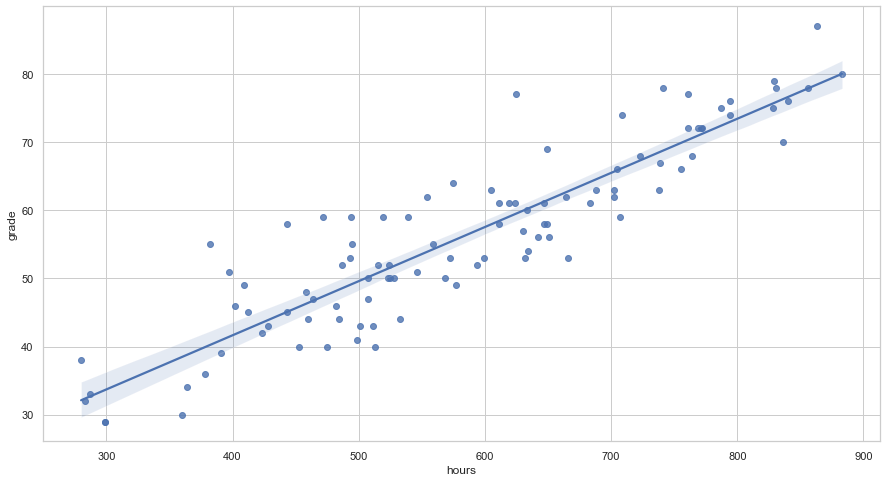

In [400]:
sns.regplot(x="hours", y="grade", data=df);

In [401]:
### We draw an example of the data WITHOUT RANDOM ERROR

In [518]:
y_not_real = beta_0 + (beta_1 * X)  # the y is simply the equation of the line
df_not_real = pd.DataFrame({"hours": X, "grade": y_not_real}).round().astype(int)

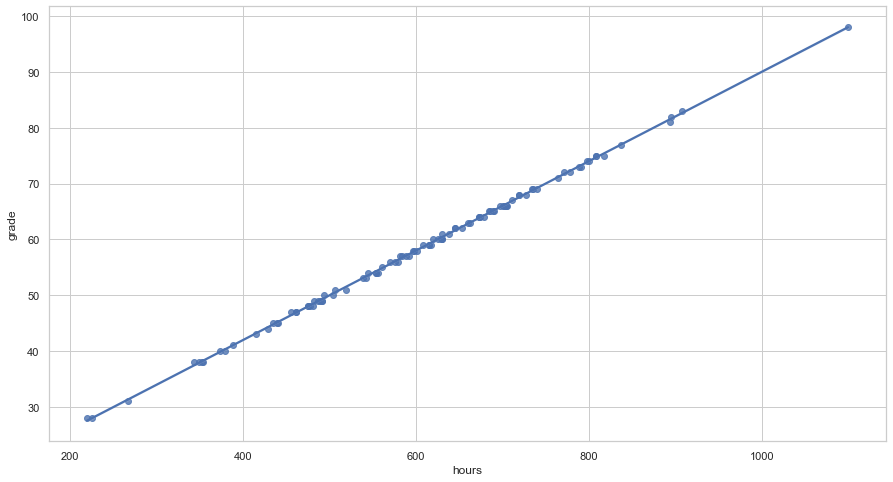

In [519]:
sns.regplot(x="hours", y="grade", data=df_not_real);

Of course, in real life we ​​don't know the true parameters of the model, nor if the model is real!!! Today we are going to learn a [valuable lesson](https://en.wikipedia.org/wiki/All_models_are_wrong):


<center> <b>"All the models are wrong, but some are useful"</b> </center>


In practice, what we do is, after seeing a scatter plot like the one above, we try to infer the model parameters $\beta_0$ and the slope, $\beta_1$. Once estimated, the estimated fit becomes $$ \hat{Y} = \hat{beta_0} + \hat{beta_1} X$$

In [404]:
lr = LinearRegression()

We are going to train a regression model that removes the coefficients with sklearn and we do it with the first model that we have generated that had NOISE/ERROR

In [405]:
lr.fit(
    X = df[["hours"]], #is always a dataframe that's why I put double brackets
    y = df.grade #is a pandas series
)

LinearRegression()

In [406]:
lr.intercept_

9.884620627326832

In [407]:
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
print(beta_0, beta_1)

9.884620627326832 0.07942170501694676


`coef_` It will be a list of coefficients of all the predictor variables, in this case we only have one, the hours we have studied

In [408]:
lr.coef_[0] # I take element 0 because I only have one predictor variable

0.07942170501694676

In [409]:
df.head()

,hours,grade
0,568,50
1,739,67
2,499,41
3,577,49
4,378,36


In [410]:
df["predict"] = (df.hours * lr.coef_[0]) + lr.intercept_

In [411]:
df.head()

,hours,grade,predict
0,568,50,54.996149
1,739,67,68.577261
2,499,41,49.516051
3,577,49,55.710944
4,378,36,39.906025


Reminder for the syntax life of an ML model

```python
SYNTAX = MODEL.FIT (X,y)
```

In [412]:
df.head()

,hours,grade,predict
0,568,50,54.996149
1,739,67,68.577261
2,499,41,49.516051
3,577,49,55.710944
4,378,36,39.906025


In [413]:
# Now we do it with the data THAT DOES NOT CARRY NOISE

In [414]:
lr2 = LinearRegression()

In [415]:
lr2.fit(
    X = df_irreal[["hours"]],
    y = df_irreal.grade
)

LinearRegression()

In [416]:
beta_1_not_real = lr2.coef_[0]
beta_0_not_real = lr2.intercept_

In [417]:
print("beta_1_not_real: ", beta_1_not_real)
print("beta_0_not_real: ", beta_0_not_real)

beta_1_not_real:  0.07964665994062312
beta_0_not_real:  10.235546145014744


In [418]:
beta_1 == beta_1_not_real

False

In [419]:
df_not_real.head()

,hours,grade
0,568,46
1,739,47
2,499,67
3,577,62
4,378,76


## How good is our model?

The numerical difference between the *least squares regression line* and the actual value is called the *residual* , and it represents the error in the estimate: $e = y_i - \hat{y}$.
The regression line minimized the **Residual Sum of Squares** (RSS)

The residual sum of squares measures the amount of error remaining between the regression function and the data set. a smaller residual sum of squares represents a regression function. The residual sum of squares, also known as the sum of squared residuals, essentially determines how well a regression model explains or represents the data in the model.

$$RSS = e_1^2 + e_2^2 + \dots + e_n ^2$$

If we only used the mean as the predicted value for each prediction, the error we would make is (**total sum of squares**)

$$TSS=\Sigma(y_i - \bar{y}_i)^2$$
Let's consider this our starting point, make a prediction and plot it

In [420]:
# Let's put it in a dataframe to see it more clearly

In [421]:
df["avg"] = df.grade.mean()
df.head()

,hours,grade,predict,avg
0,568,50,54.996149,56.39
1,739,67,68.577261,56.39
2,499,41,49.516051,56.39
3,577,49,55.710944,56.39
4,378,36,39.906025,56.39


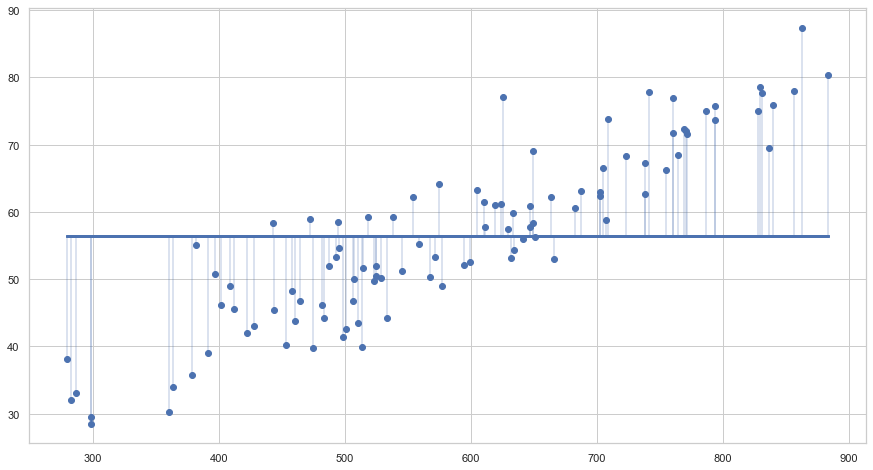

In [422]:
#grades = [df.grade.mean()] * num_grades
plt.scatter(X,y)
plt.plot(X, df.avg, lw=3)
plt.vlines(X, df.avg, y, lw=0.4)

In [423]:
# Calculate TSS for the above model
TSS = ((df.grade - df.avg) ** 2).sum()
TSS

17099.789999999997

Recall that linear regression coefficients minimize the $RSS=Sigma(y_i - \hat{y_i})^2$, that is, the amount of variability that remains unexplained after running the regression. The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination):

$$R^2 = \frac{TSS -RSS}{TSS} = 1-\frac{RSS}{TSS}$$

measures the "*proportion of variability in Y that can be explained by X*". It is a measure of the linear relationship that exists between $X$ and $y$.

**Note:** in the case of simple linear regression, the $R^2$ coefficient is nothing more than the square of the *Pearson* correlation coefficient that we already know.

In [424]:
df.head()

,hours,grade,predict,avg
0,568,50,54.996149,56.39
1,739,67,68.577261,56.39
2,499,41,49.516051,56.39
3,577,49,55.710944,56.39
4,378,36,39.906025,56.39


In [425]:
df.head()

,hours,grade,predict,avg
0,568,50,54.996149,56.39
1,739,67,68.577261,56.39
2,499,41,49.516051,56.39
3,577,49,55.710944,56.39
4,378,36,39.906025,56.39


## Calculate the R2 of the model

In [426]:
RSS = ((df.grade - df["predict"]) ** 2).sum()
RSS

3048.299423053982

In [427]:
# Calculate TSS for the above model
TSS = ((df.grade - df.avg) ** 2).sum()
TSS

17099.789999999997

In [428]:
r2 = 1-(RSS/TSS)

In [429]:
r2

0.8217346866216496

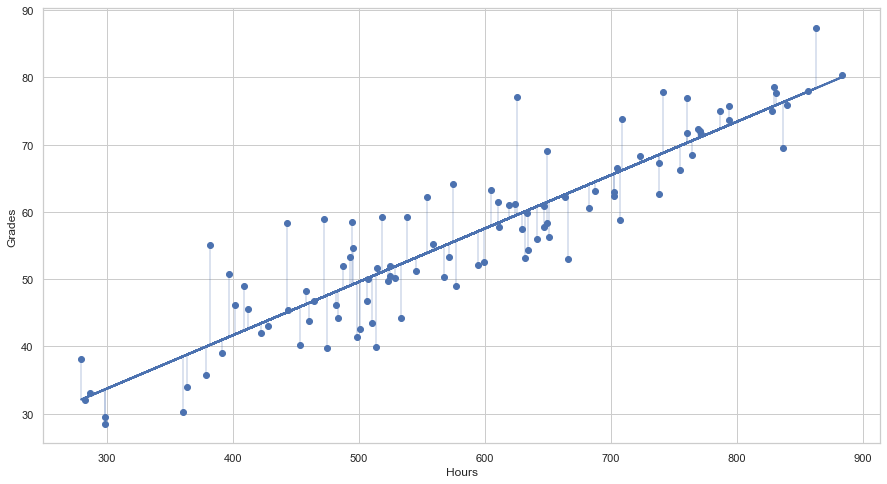

In [430]:
line = beta_0 + beta_1 * X
plt.scatter(X,y)
plt.plot(X,line, lw=2)
plt.vlines(X,line,y, lw=0.4)
plt.xlabel("Hours")
plt.ylabel("Grades");

$R^2$ measures how good our regression model is. The bigger the better. It is a value between 0 and 1

**NOTE**: it is computable for any model, it does not matter if it is linear or not. Only the actual and predicted values ​​are needed.

## Linear regression with sklearn

In [431]:
df.head()

,hours,grade,predict,avg
0,568,50,54.996149,56.39
1,739,67,68.577261,56.39
2,499,41,49.516051,56.39
3,577,49,55.710944,56.39
4,378,36,39.906025,56.39


In [432]:
# Save the variables x,y
X = df[["hours"]]
y = df.grade

In [433]:
# train the algorithm
lr.fit(X,y)

LinearRegression()

In [434]:
df["predict_algorithm"] = lr.predict(X)

In [435]:
df.head()

,hours,grade,predict,avg,predict_algorithm
0,568,50,54.996149,56.39,54.996149
1,739,67,68.577261,56.39,68.577261
2,499,41,49.516051,56.39,49.516051
3,577,49,55.710944,56.39,55.710944
4,378,36,39.906025,56.39,39.906025


In [436]:
from sklearn import metrics

**Calculation of the absolute mean error, the mean square error and the mean square error

- **MAE** is the easiest to understand, because it is the mean error.
- **The MSE** is more popular than the MAE, because the MSE accounts for larger errors, which is often useful in the real world.
- **RMSE** is even more popular than MSE, it is the square root of the MSE and measures the standard deviation of the residuals.

These are all **loss functions**: we want to minimize them.

In [437]:
print(f"MAE: ", metrics.mean_absolute_error(df.grade, df.predict_algorithm))
print(f"MSE: ", metrics.mean_squared_error(df.grade, df.predict_algorithm))
print(f"RMSE: ", np.sqrt(metrics.mean_squared_error(df.grade, df.predict_algorithm)))
print(f"R2: ", metrics.r2_score(df.grade, df.predict_algorithm))

MAE:  4.251999397118403
MSE:  30.48299423053982
RMSE:  5.521140663897254
R2:  0.8217346866216496


Read more about MAE, MSE, RMSE AND R2 [here](http://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e)

## Linear regression with statsmodels

A bit of [documentation](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html)

And [this article](https://jyotiyadav99111.medium.com/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01) that summarizes how to interpret OLS summary information

In [438]:
results = smf.ols("grade ~ hours", data = df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     451.7
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           1.77e-38
Time:                        00:55:15   Log-Likelihood:                -312.75
No. Observations:                 100   AIC:                             629.5
Df Residuals:                      98   BIC:                             634.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8846      2.258      4.378      0.000       5.404      14.366
hours          0.0794      0.004     21.254      0.000       0.072       0.087
==============================================================================
Omnibus:                        8.423   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.174
Skew:                           0.677   Prob(JB):                       0.0168
Kurtosis:                       3.355   Cond. No.                     2.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## OLS Concepts

- <b>R2</b> : The coefficient of determination measures how much of the variation of 𝑦 is explained by the model.
If the variance of the errors or residuals 𝜎2𝑒 is zero, the model explains 100% of the variable 𝑦. If 𝜎2𝑒 is equal to the variance of 𝑦 the model explains nothing and 𝑅2 is equal to zero.


- <b>𝑅¯2 </b> : The adjusted correlation coefficient 𝑅¯2 corrects the value of 𝑅2 by the number of variables 𝑘 (equal to 2 for the analyzed case) and the amount of data 𝑁

- <b>P value </b> The p-value for each term tests the null hypothesis that the coefficient is equal to zero (has no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. ... Typically p-values ​​are used to determine which terms should be kept in the regression model.


Description of the p value:
The p-value is a probability value, so it ranges between 0 and 1. The p-value shows us the probability of having obtained the result that we have obtained assuming that the null hypothesis H0 is true. It is often said that high values ​​of p do not allow H0 to be rejected, while low p values ​​do allow H0 to be rejected.

In a statistical test, the null hypothesis H0 is rejected if the p-value associated with the observed result is equal to or less than an arbitrarily set $\alpha$ significance level, conventionally 0.05 or 0.01. In other words, if the result obtained is more unusual than the expected range of results given a true null hypothesis H0 and the chosen significance level $\alpha$, that is, if p is less than $\alpha$, we can say that we have a statistically significant result that allows reject H0.

It is important to emphasize that a hypothesis test does not allow accepting a hypothesis; he simply rejects it or does not reject it, that is to say, he dismisses it as plausible (which does not necessarily mean that it is true, simply that it is more likely to be) or implausible.

## Multiple Linear Regression

Of course, the hours one studies are not the only important factor in getting good grades in the real world. We can think of IQ, for example, as another determining factor. In fact, we can generalize a linear model to have as many variables as we want:

 $$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_2 X_m + \epsilon$$
 
 In this case, what we are going to do is add a variable that subtracts from the note, the party hours.
 Imagine that for every hour that we go out partying, neurons in our brain die and we forget information, therefore, we will lose a grade (remember that we are inventing data)

In [439]:
# We recreate the dataframe with the grades
beta_0 = 10
beta_1 = 0.08
beta_2 = -0.03
num_grades = 100

In [440]:
study_hours = np.random.normal(500,200, num_grades)
party_hours = np.random.normal(500,200,num_grades)
y = (beta_0) + (beta_1 * study_hours) + (beta_2 * party_hours) + (np.random.normal(loc=0, scale=5, size=num_grades))

In [441]:
data = pd.DataFrame({"grades": y, "study_hours": study_hours, "party_hours":party_hours}).astype(int)

In [442]:
data.head()

,grades,study_hours,party_hours
0,54,697,431
1,39,521,565
2,34,441,490
3,35,586,299
4,12,256,498


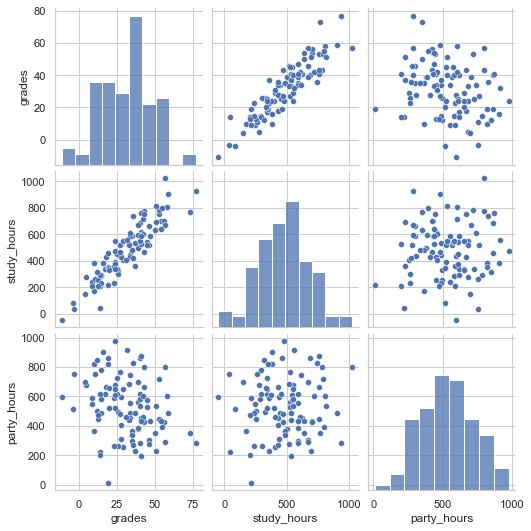

In [443]:
sns.pairplot(data); 

The multiple linear regression coefficients are computed in a similar way to the simple linear regression case: they minimize

$$RSS = \Sigma(y_i - \hat{y_i})^2$$


where:

 $$ \hat{y} = \hat{beta_0} + \hat{beta_1 X_1} + \hat{beta_2} X_2 + \hat + \hat{\beta_2} X_m$$

In [444]:
# We analyze the results with the OLS

The coefficient is the number by which we multiply the predictor variable (X) in this case we have two, study hours and party hours.
The positive coefficient indicates that the correlation is positive (the more hours I study, the better the grade I get) and the coefficient of party hours is negative, therefore it indicates that if that predictive variable is greater, my target variable decreases.

In [445]:
results = smf.ols("grades ~ study_hours + party_hours", data=data).fit()

In [446]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     497.7
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           9.96e-52
Time:                        00:55:18   Log-Likelihood:                -300.47
No. Observations:                 100   AIC:                             606.9
Df Residuals:                      97   BIC:                             614.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.8330      1.826      5.385      0.000       6.209      13.457
study_hours     0.0735      0.002     30.356      0.000       0.069       0.078
party_hours    -0.0255      0.003     -9.925      0.000      -0.031      -0.020
==============================================================================
Omnibus:                        2.380   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                2.301
Skew:                           0.364   Prob(JB):                        0.316
Kurtosis:                       2.852   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Categorical variables

Very often we are faced with situations where the predictors are *qualitative* in nature. A good example could be the music they listen to which can take the values ​​$rock$ or $indie$.

In [447]:
data["music"] = np.random.choice(["rock", "indie"], num_grades)

In [448]:
# We analyze the results with the OLS

In [449]:
data.sample(3)

,grades,study_hours,party_hours,music
52,41,760,872,rock
29,13,256,449,rock
95,15,235,490,indie


In [450]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   grades       100 non-null    int64 
 1   study_hours  100 non-null    int64 
 2   party_hours  100 non-null    int64 
 3   music        100 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [451]:
## How do we work with these variables?

In [452]:
pd.get_dummies(data)

,grades,study_hours,party_hours,music_indie,music_rock
0,54,697,431,1,0
1,39,521,565,1,0
2,34,441,490,1,0
3,35,586,299,1,0
4,12,256,498,0,1
...,...,...,...,...,...
95,15,235,490,1,0
96,13,209,471,0,1
97,12,318,846,1,0
98,54,637,435,1,0


In [453]:
data["listens_to_rock"] = data.music.str.get_dummies()["rock"]
data.head()

,grades,study_hours,party_hours,music,listens_to_rock
0,54,697,431,indie,0
1,39,521,565,indie,0
2,34,441,490,indie,0
3,35,586,299,indie,0
4,12,256,498,rock,1


We include this information in the model through a *dummy* variable:
$$
x_i= \left\{
\begin{array}{ll}
      1  \quad \text{if listens to rock} \\
      0  \quad \text{if listens to indie} \\
\end{array} 
\right. 
$$


If this is our only variable, this results in a model:

$$y_i = \beta_0 + \beta_1 x_i +\epsilon_i = \left\{
\begin{array}{ll}
      \beta_0 + \beta_1 +\epsilon_i  \quad \text{if listens to rock} \\
      \beta_0 + \epsilon_i  \quad \text{if listens to indie} \\
\end{array} 
\right.  $$

In this case, $\beta_0$ represents the average score of people who listen to rock, and $\beta_0 + \beta_1$ the average score of people who listen to indie.

In [454]:
results = smf.ols("grades ~ study_hours + party_hours + listens_to_rock", data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     331.0
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           1.77e-50
Time:                        00:55:18   Log-Likelihood:                -300.10
No. Observations:                 100   AIC:                             608.2
Df Residuals:                      96   BIC:                             618.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5726      2.029      5.210      0.000       6.544      14.601
study_hours         0.0731      0.002     29.530      0.000       0.068       0.078
party_hours        -0.0258      0.003     -9.925      0.000      -0.031      -0.021
listens_to_rock    -0.8732      1.039     -0.840      0.403      -2.936       1.190
==============================================================================
Omnibus:                        2.340   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.310   Jarque-Bera (JB):                2.008
Skew:                           0.346   Prob(JB):                        0.366
Kurtosis:                       3.046   Cond. No.                     3.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear model extensions

There are several assumptions used when fitting a linear model.
Linear model assumptions 
[VIDEO](https://www.youtube.com/watch?v=hVe2F9krrWk)

* Errors are normally distributed and have constant variance
* Errors are not correlated with each other

***Additive Assumption** The effect of changes in a predictor $X_j$ on the response $Y$ is independent of the values ​​of the other predictors.

***Linear Assumption**The change in the answer for a unit increase in $X_j$ is the same regardless of the value of $X_j$.

### Challenging the additive assumption: synergy

Sometimes our variables will have natural interactions. For example, we may think that the more our ads are heard on the radio, the more effective our TV ads will be. That is, the effect of both is *greater* (or *lesser*) than the sum of the parts.

This is a commonly studied topic in [marketing](https://smallbusiness.chron.com/definition-synergy-marketing-21786.html)

In [455]:
df_adv = pd.read_csv('../datasets/Advertising.csv')

## Let's do it
* Create three independent simple linear regression models
* Interpret the results
* Create a multivariate model with the three predictors
* Interpret the results

In [456]:
df_adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


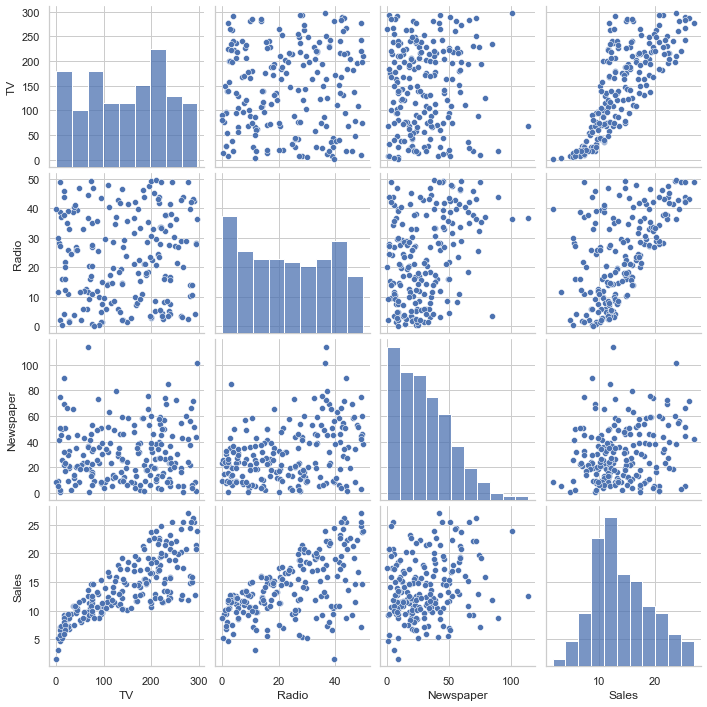

In [457]:
sns.pairplot(df_adv)

In [458]:
results = smf.ols("Sales ~ TV + Radio + Newspaper", data = df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           1.58e-96
Time:                        00:55:20   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [459]:
results = smf.ols("Sales ~ TV + Radio", data = df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           4.83e-98
Time:                        00:55:20   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [460]:
results = smf.ols("Sales ~  TV + Radio + TV * Radio", data = df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          6.68e-146
Time:                        00:55:20   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [461]:
# Gift for today's lab
df_adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [462]:
results = smf.ols("Sales ~ TV", data = df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           1.47e-42
Time:                        00:55:20   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The difference is that the covariance gives us the direction (positive or negative) between the variables and the correlation gives us this plus the strength of it.

Remember the **hierarchical principle:**

"*If we include an interaction in a model, we must also include the main effects, even if the p-values ​​associated with its coefficients are not significant*"

## Model selection

### $R^2$ Adjusted
There is a curious thing with $R^2$. Look what happens when we include *random* variables!

In [464]:
df_adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [465]:
df_adv['rand_1'] = np.random.normal(size=200)
df_adv['rand_2'] = np.random.normal(size=200)
df_adv['rand_3'] = np.random.normal(size=200)
df_adv['rand_4'] = np.random.normal(size=200)
df_adv['rand_5'] = np.random.normal(size=200)
df_adv['rand_6'] = np.random.normal(size=200)
df_adv['rand_7'] = np.random.normal(size=200)
df_adv['rand_8'] = np.random.normal(size=200)

In [466]:
df_adv.sample(4)

,TV,Radio,Newspaper,Sales,rand_1,rand_2,rand_3,rand_4,rand_5,rand_6,rand_7,rand_8
68,237.4,27.5,11.0,18.9,0.046615,0.362252,0.002808,-1.765418,-0.329250,0.254307,0.389633,0.079773
193,166.8,42.0,3.6,19.6,-1.675570,-1.144320,1.162218,-0.637408,-0.594672,0.014918,-0.358437,0.154792
17,281.4,39.6,55.8,24.4,-0.343994,-0.344909,-0.981478,-0.728150,-0.169724,-1.578004,0.275235,-1.423301
151,121.0,8.4,48.7,11.6,0.013071,-0.767217,-0.409712,0.212461,0.771667,-1.099581,-0.320486,-2.130190


In [467]:
results = smf.ols("Sales ~ TV + Radio  + rand_1 + rand_2 + rand_3 + rand_4 + rand_5 + rand_6 + rand_7 + rand_8", data = df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     176.0
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           4.35e-90
Time:                        00:55:24   Log-Likelihood:                -380.38
No. Observations:                 200   AIC:                             782.8
Df Residuals:                     189   BIC:                             819.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8022      0.297      9.430      0.000       2.216       3.388
TV             0.0459      0.001     32.619      0.000       0.043       0.049
Radio          0.1928      0.008     23.368      0.000       0.177       0.209
rand_1         0.0120      0.115      0.105      0.917      -0.215       0.239
rand_2         0.2073      0.122      1.699      0.091      -0.033       0.448
rand_3        -0.1716      0.134     -1.278      0.203      -0.436       0.093
rand_4        -0.0099      0.132     -0.074      0.941      -0.271       0.251
rand_5         0.1430      0.126      1.132      0.259      -0.106       0.392
rand_6        -0.2152      0.116     -1.853      0.065      -0.444       0.014
rand_7        -0.0879      0.109     -0.805      0.422      -0.303       0.128
rand_8        -0.0114      0.122     -0.093      0.926      -0.253       0.230
==============================================================================
Omnibus:                       44.564   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.223
Skew:                          -1.071   Prob(JB):                     6.96e-20
Kurtosis:                       5.450   Cond. No.                         434.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient `Adj. R-squared` is intended to penalize the $R^2$ of a model when *too many* variables are included.
$$\bar R^2 = 1-(1-R^2){n-1 \ over n-p-1}$$

## Potential problems in linear regression

The main assumptions of a linear model are:

* Data is linear
* Errors are not correlated
* The variance of the error terms is constant

What happens if these assumptions are not met?

In addition, our models can suffer from other problems such as:
* Outliers
* High leverage points
* Collinearity
* Missing values

See this [video](https://www.youtube.com/watch?v=hVe2F9krrWk) for an introduction to the topic.

These four data sets are different, but they happen to have the same arithmetic mean and variance of the x and y values, the same correlation, the same correlation coefficient, and the same regression line. some with 2 or 3 decimal places. They are the Anscombe Quartet, named for F.J. Anscombe, a statistical mathematician who published them in 1973. They are often used to teach that in addition to calculating the statistical properties of data, it is convenient to visualize them.

In all cases, the representations tell us something more about the data: the first ones seem somewhat random but related, the second ones show a clear but remarkably different pattern; in the third and fourth there are other patterns clouded by some outliers. These values ​​can be errors, real data that is just out of the ordinary, or even artificially produced data to make it all fit together.

Moral: don't blindly trust the data and neither the statistics you get from them; also try to set up a visualization to understand them.
![anscombe](../images/anscombe.png)

## Summary

- How to evaluate from different metrics if our model is good or bad (R2,RMSE,MSE,MAE)
- P important value: it helps us to know if the predictor variables are significant or not
- Take into account possible multiplier effects on the variables (we challenge the additive assumption, we have mastery of the data)
- Adjusted R2 will always be less than R2 because it subtracts for each column/variable
- Categorical variables - We encode them with GET DUMMIES
- Summary of the OLS we not only see the coefficients (intercept / coef of each variable) but also the importance of those variables, the R2 and other statistical tests
- In the end, what we want to calculate when we do a regression or we face a linear regression problem, either with one variable or multivariable, is THE EQUATION OF A LINE, so we will have the ordinate at the origin and the slope, it will be a line of N dimensions if I have N variables

## Further Materials 

* One example of [linear regression with the Boston data set](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)